# **Desafío 2. Modelo de regresion para estimar precio de propiedades**
## Análisis dataset de propiedades(Properati), basado en venta de propiedades
 ---
#### Integrantes
- Alejo Di Lelle
- Mariano Fernandez Ferreyra
- Martina Garcia
- Rafael Giordano
- Alejo Paulisich Bustelo

 ---

# **Objetivo del trabajo**
- Seleccionar los datos a modelar. Justificar esa selección.
- Entrenar al menos tres modelos de regresión lineal distintos sobre estos datos.
- Evaluar la performance de los modelos y comparar ventajas y desventajas de cada uno.
- Determinar la importancia de las features incluidas en la predicción. Interpretar.


# Librerias y lectura del dataset

In [1]:
#Estas son las librerias que vamos a utilizar para el analisis de los datos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [128]:
df = pd.read_csv('data/properati_limpio.csv', index_col='Unnamed: 0')

In [129]:
df.head()

,property_type,place_name,place_with_parent_names,state_name,geonames_id,lat,lon,price,currency,price_aprox_local_currency,...,barrio,price_usd_per_m2,pileta,cochera,gimnasio,seguridad,salon,parrilla,balcon,estrenar
0,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,3430787.0,-34.661824,-58.508839,62000.0,USD,1093959.0,...,Mataderos,1127.272727,0,0,0,0,0,0,0,0
1,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Bs.As. G.B.A. Zona Sur,3432039.0,-34.903883,-57.964330,150000.0,USD,2646675.0,...,La Plata,NaN,0,1,0,0,0,0,0,1
2,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,3430787.0,-34.652262,-58.522982,72000.0,USD,1270404.0,...,Mataderos,1309.090909,0,0,0,0,0,0,0,0
3,PH,Liniers,|Argentina|Capital Federal|Liniers|,Capital Federal,3431333.0,-34.647797,-58.516424,95000.0,USD,1676227.5,...,Liniers,NaN,0,0,0,0,0,0,0,0
4,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Buenos Aires Costa Atlántica,3435548.0,-38.002626,-57.549447,64000.0,USD,1129248.0,...,Centro,1828.571429,0,0,0,0,0,0,0,0


In [130]:
df.columns

Index(['property_type', 'place_name', 'place_with_parent_names', 'state_name',
       'geonames_id', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'floor', 'rooms', 'expenses', 'description',
       'title', 'tipo_de_cambio', 'ciudad_barrio1', 'ciudad_barrio2',
       'provincia', 'ciudad_partido', 'barrio', 'price_usd_per_m2', 'pileta',
       'cochera', 'gimnasio', 'seguridad', 'salon', 'parrilla', 'balcon',
       'estrenar'],
      dtype='object')

In [131]:
# copiamos df a otro dataframe llamado data para empezar a modificarlo
data = df.copy()

In [132]:
data.isnull().sum()

property_type                      0
place_name                         0
place_with_parent_names            0
state_name                         0
geonames_id                    17742
lat                             8032
lon                             8032
price                          16981
currency                       16541
price_aprox_local_currency     16540
price_aprox_usd                16540
surface_total_in_m2            13512
surface_covered_in_m2          11458
floor                         106836
rooms                          53719
expenses                       93736
description                        2
title                              0
tipo_de_cambio                 16982
ciudad_barrio1                 18187
ciudad_barrio2                 18187
provincia                          0
ciudad_partido                  3285
barrio                         36148
price_usd_per_m2               23953
pileta                             0
cochera                            0
g

In [133]:
# borramos las columnas que no nos interesan para entrenar el modelo
data.drop(columns=['place_name','state_name','expenses', 'floor','geonames_id','currency','price_aprox_local_currency','price','tipo_de_cambio','ciudad_barrio1','ciudad_barrio2','price_usd_per_m2'], inplace=True)
data.columns

Index(['property_type', 'place_with_parent_names', 'lat', 'lon',
       'price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2',
       'rooms', 'description', 'title', 'provincia', 'ciudad_partido',
       'barrio', 'pileta', 'cochera', 'gimnasio', 'seguridad', 'salon',
       'parrilla', 'balcon', 'estrenar'],
      dtype='object')

# Analisis columna superficie

In [134]:
# busco propiedades con superficie cubierta mayor que total

data[data.surface_covered_in_m2 > data.surface_total_in_m2]

,property_type,place_with_parent_names,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,rooms,description,title,...,ciudad_partido,barrio,pileta,cochera,gimnasio,seguridad,salon,parrilla,balcon,estrenar
78,house,|Argentina|Misiones|Posadas|,-27.355467,-55.902112,308460.22,261.0,18615.0,5.0,"S/AVDA COSTANERA , NUEVA ZONA GASTRONOMICA...",Oportunidad! Casa zona Bahía el Brete,...,Posadas,NaN,0,0,0,0,0,1,0,0
177,apartment,|Argentina|Córdoba|Villa Carlos Paz|,-31.420074,-64.494711,470000.00,420.0,450.0,9.0,"CASA PRINCIPAL QUE CONSTA DE 3 DORM,.AMPLIOS,2...",SE VENDE VIVIENDA+LOCALES COMERCIALES+DPTOS,...,Villa Carlos Paz,NaN,0,0,0,0,0,0,0,0
229,apartment,|Argentina|Capital Federal|Belgrano|,-34.564008,-58.456704,92600.00,27.0,33.0,1.0,"Monoambientes a la venta, en inmejorable zona ...",Venta Monoambiente- Inmejorable zona de Belgrano,...,Capital Federal,Belgrano,1,1,1,1,1,0,0,0
316,house,|Argentina|Capital Federal|,-34.600000,-58.450000,430000.00,125.0,156.0,NaN,Buena ubicaciÃ³n. Muy buen acceso. Lezica esq....,"Casa 125m² con 3 Plantas en Lezica, Martín 300...",...,Capital Federal,NaN,0,0,0,0,0,0,0,0
455,house,|Argentina|Buenos Aires Costa Atlántica|Mar de...,-37.963899,-57.579031,119000.00,170.0,430.0,4.0,CHALET TOTALMENTE DESARROLLADO EN PLANTA BAJA ...,chalet 4 ambientes apto credito,...,Mar del Plata,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120168,house,|Argentina|Buenos Aires Costa Atlántica|Necochea|,-38.555890,-58.749310,130000.00,120.0,140.0,6.0,"casa en dos plantas, primer piso tres dormitor...",casa en dos plantas 4 dormitorios,...,Necochea,NaN,0,0,0,0,0,0,1,0
120181,house,|Argentina|Córdoba|Córdoba|,-31.391578,-64.137452,114971.53,153.0,226.0,3.0,"Casa Yofre Sur , APTO CRÉDITO, Córdoba 3 habit...","Vendo Casa Yofre Sur , APTO CRÉDITO, Córdoba",...,Córdoba,NaN,0,1,0,0,0,0,0,0
120202,PH,|Argentina|Buenos Aires Costa Atlántica|Mar de...,-38.030114,-57.574442,50000.00,70.0,200.0,3.0,"Hermoso PH Con dos Habitaciones, una en suite ...","Excelente PH en impecables condiciónes, Digno ...",...,Mar del Plata,NaN,0,0,0,0,0,0,0,0
120221,house,|Argentina|Bs.As. G.B.A. Zona Norte|Escobar|,-34.333330,-58.750000,80777.31,62.0,138.0,NaN,"UF 25 . Casa Tipo Duplex, estilo americano.,...",UF 25 Etapa 1 Casa a construir 2 dormitorios ...,...,Escobar,Escobar,0,0,0,0,0,0,0,0


In [135]:
# reemplazo la cubierta por la total en las filas que encontre arriba
data.loc[(data.surface_covered_in_m2 > data.surface_total_in_m2),'surface_covered_in_m2'] = data['surface_total_in_m2']

In [136]:
# chequeo que se imputo bien
data[data.surface_covered_in_m2 > data.surface_total_in_m2]

,property_type,place_with_parent_names,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,rooms,description,title,...,ciudad_partido,barrio,pileta,cochera,gimnasio,seguridad,salon,parrilla,balcon,estrenar


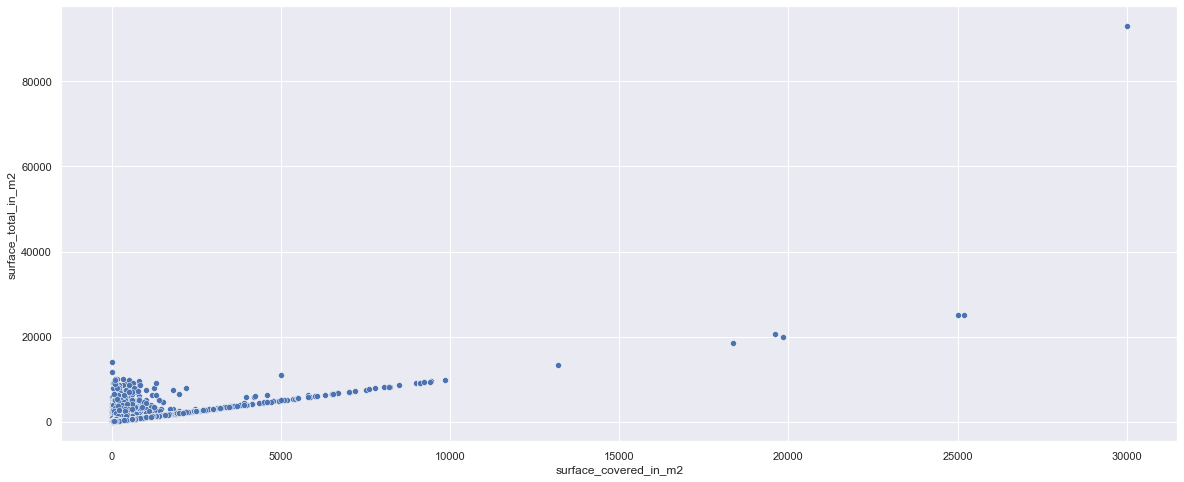

In [137]:
sns.set_style('darkgrid')
plt.figure(figsize=(20, 8))
sns.scatterplot(data=data, x="surface_covered_in_m2", y='surface_total_in_m2')

plt.show()


<AxesSubplot: xlabel='surface_covered_in_m2'>

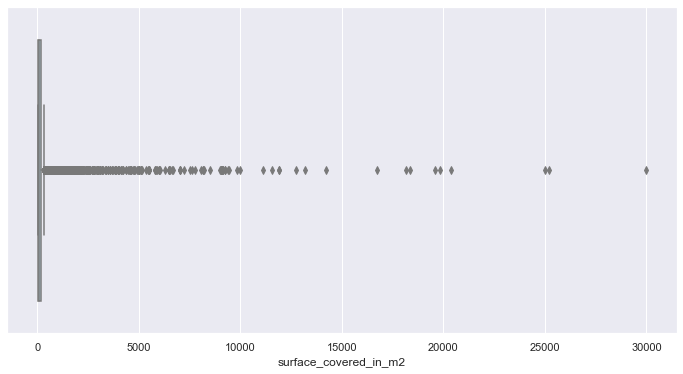

In [138]:
sns.boxplot(x = "surface_covered_in_m2", data=data,
               palette=["lightblue", "lightpink"])

In [139]:
# el tercer cuartil de surface cubierta es 156m2 y para total 206m2
surface_describe = data[['surface_covered_in_m2','surface_total_in_m2']].describe()
surface_describe

,surface_covered_in_m2,surface_total_in_m2
count,102749.000000,100695.000000
mean,137.322485,221.540265
std,347.823183,589.007512
min,11.000000,11.000000
25%,46.000000,50.000000
50%,76.000000,87.000000
75%,156.000000,206.000000
max,30000.000000,93000.000000


In [140]:
# Rango intercuartil
rango_inter_cuartil = (surface_describe.loc['75%','surface_total_in_m2']) - (surface_describe.loc['25%','surface_total_in_m2'])
rango_inter_cuartil 

156.0

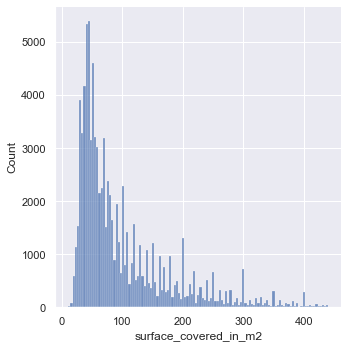

In [141]:
# grafico las propiedades quitando outliers
# el criterio para definirlos es 3q + 1.5 * rango inter cuartil
tercer_cuartil = surface_describe.loc['75%','surface_total_in_m2']

criterio_outlier_superficie = tercer_cuartil + rango_inter_cuartil * 1.5

sns.displot(data=data[data.surface_total_in_m2 <= (criterio_outlier_superficie)],x="surface_covered_in_m2")

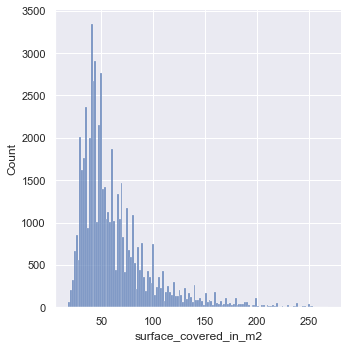

In [142]:
# ahora vamos a observar los outliers de departamentos que es el tipo de propiedad con el que vamos a trabajar
mask_apt = data['property_type'] == 'apartment'
data_apt = data[mask_apt].copy()

surface_describe_apt = data_apt[['surface_covered_in_m2','surface_total_in_m2']].describe()

rango_inter_cuartil_apt = (surface_describe_apt.loc['75%','surface_total_in_m2']) - (surface_describe_apt.loc['25%','surface_total_in_m2'])

tercer_cuartil_apt = surface_describe.loc['75%','surface_total_in_m2']

criterio_outlier_superficie_apt = tercer_cuartil_apt + rango_inter_cuartil_apt * 1.5

sns.displot(data=data_apt[data_apt.surface_total_in_m2 <= (criterio_outlier_superficie_apt)],x="surface_covered_in_m2")

In [143]:
# shape antes de eliminar outliers
data_apt.shape

(65242, 21)

In [144]:
# busco los indices de los departamentos que se consideran outliers por superficie
apt_mayores_a_3q = data_apt.loc[data_apt.surface_total_in_m2 > (criterio_outlier_superficie_apt)].index

data_apt.drop(apt_mayores_a_3q, inplace=True)

In [145]:
# shape despues de eliminar outliers
data_apt.shape

(63993, 21)

# Analisis columna precio

In [147]:
data_apt.columns

Index(['property_type', 'place_with_parent_names', 'lat', 'lon',
       'price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2',
       'rooms', 'description', 'title', 'provincia', 'ciudad_partido',
       'barrio', 'pileta', 'cochera', 'gimnasio', 'seguridad', 'salon',
       'parrilla', 'balcon', 'estrenar'],
      dtype='object')

<AxesSubplot: xlabel='price_aprox_usd'>

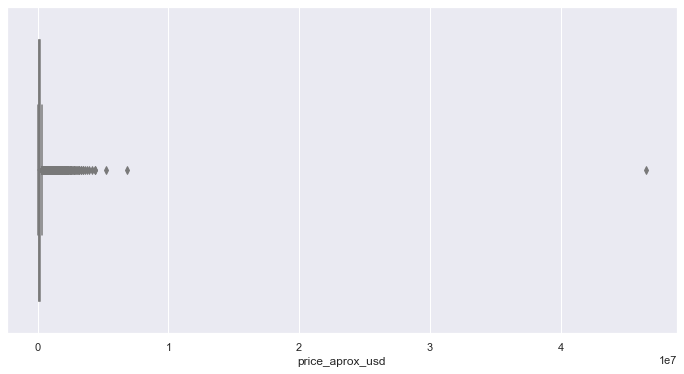

In [148]:
sns.boxplot(x = "price_aprox_usd", data=data_apt,
               palette=["lightblue", "lightpink"])

In [155]:
price_describe = data_apt.price_aprox_usd.describe()
price_describe

count    5.590600e+04
mean     1.749255e+05
std      2.802146e+05
min      1.000000e+03
25%      8.000000e+04
50%      1.180000e+05
75%      1.870000e+05
max      4.654544e+07
Name: price_aprox_usd, dtype: float64

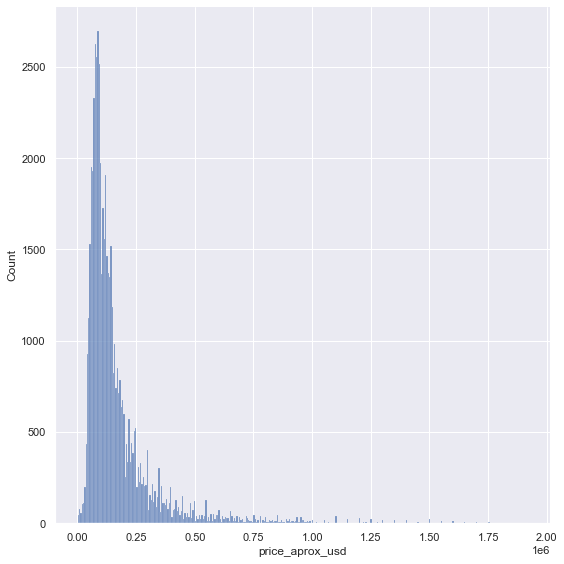

In [188]:
# grafico las propiedades quitando outliers
# hay que elegir el criterio que queremos usar
tercer_cuartil_price = price_describe.loc['75%']

rango_inter_cuartil_price = (price_describe.loc['75%']) - (price_describe.loc['25%'])

criterio_outlier_price = tercer_cuartil_price + rango_inter_cuartil_price * 10

data_apt_sin_outlier_precio = data_apt[data_apt.price_aprox_usd <= 2000000]

sns.displot(data=data_apt_sin_outlier_precio ,x="price_aprox_usd", height=8)

<AxesSubplot: xlabel='price_aprox_usd', ylabel='surface_total_in_m2'>

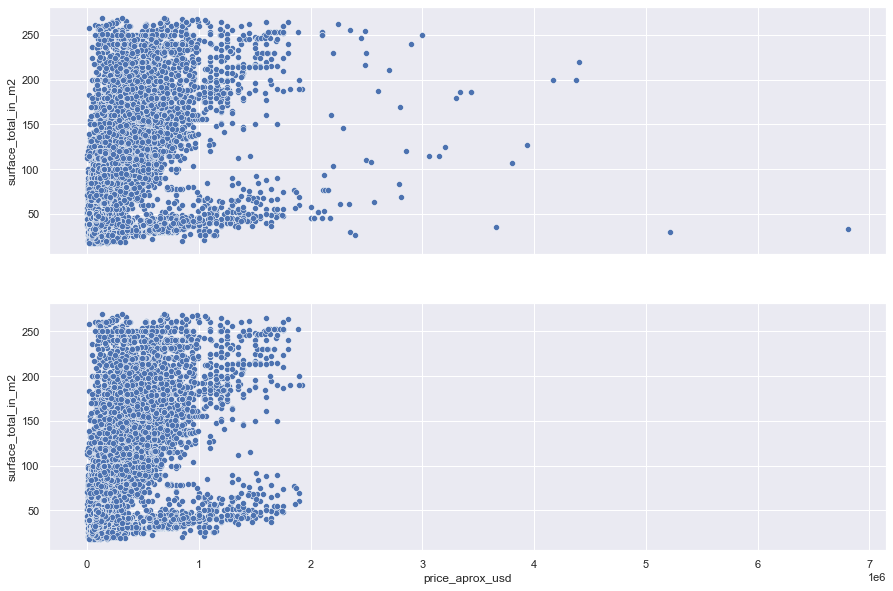

In [189]:
fig, axs = plt.subplots(nrows=2, figsize=(15,10), sharex=True)

sns.scatterplot(data=data_apt, x="price_aprox_usd", y='surface_total_in_m2', ax=axs[0])

sns.scatterplot(data=data_apt_sin_outlier_precio , x="price_aprox_usd", y='surface_total_in_m2', ax=axs[1])

In [207]:
data_apt[~(data_apt.price_aprox_usd <= criterio_outlier_price) & data_apt.price_aprox_usd.notnull()]

,property_type,place_with_parent_names,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,rooms,description,title,...,ciudad_partido,barrio,pileta,cochera,gimnasio,seguridad,salon,parrilla,balcon,estrenar
904,apartment,|Argentina|Córdoba|Córdoba|,-31.401627,-64.194918,1300000.0,90.0,90.0,2.0,Departamento en Venta de 1 dorm. en Cordoba,Departamento en Venta de 1 dorm. en Cordoba,...,Córdoba,NaN,0,0,0,0,0,0,0,0
1341,apartment,|Argentina|Capital Federal|Recoleta|,-34.596988,-58.388055,1380000.0,260.0,260.0,6.0,Edificio de Gran categoría en la mejor zona de...,Alvear 1400 1ºpiso,...,Capital Federal,Recoleta,0,1,0,1,0,0,0,0
4664,apartment,|Argentina|Capital Federal|Puerto Madero|,-34.614254,-58.360697,1370000.0,191.0,185.0,3.0,"Puerto Madero, Torre EL FARO, Espectacular Sem...",Puerto Madero Edificio El Faro Espectacular Se...,...,Capital Federal,Puerto Madero,1,1,0,0,1,0,1,0
4757,apartment,|Argentina|Capital Federal|Puerto Madero|,-34.611577,-58.361349,1350000.0,186.0,186.0,4.0,Corredor Responsable: Ariel Champanier - C.U.C...,"Puerto Madero,4 amb.,piso 40,vista río,2 coche...",...,Capital Federal,Puerto Madero,1,1,1,0,1,0,0,0
4760,apartment,|Argentina|Capital Federal|Puerto Madero|,-34.611206,-58.360577,1350000.0,112.0,112.0,2.0,Corredor Responsable: Ariel Champanier - C.U.C...,"Puerto Madero,Hotel Alvear,Dpto.piso 25,espect...",...,Capital Federal,Puerto Madero,1,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114454,apartment,|Argentina|Capital Federal|Puerto Madero|,-34.612109,-58.362547,1900000.0,190.0,184.0,4.0,Departamento con vista a todos los puntos card...,Piso en Le Parc Puerto Madero- Increible recic...,...,Capital Federal,Puerto Madero,1,0,1,1,1,0,0,0
114465,apartment,|Argentina|Capital Federal|Puerto Madero|,-34.612109,-58.362547,1820000.0,190.0,184.0,4.0,Departamento con vista a todos los puntos card...,Piso en Le Parc Puerto Madero- Increible recic...,...,Capital Federal,Puerto Madero,1,1,1,1,1,0,0,0
114584,apartment,|Argentina|Córdoba|Córdoba|,-31.424902,-64.195898,1400000.0,58.0,58.0,2.0,Departamento en Venta de 1 dorm. en Cordoba,Departamento en Venta Av. Pueyrredon 536,...,Córdoba,NaN,0,0,0,0,0,0,0,0
116991,apartment,|Argentina|Capital Federal|Palermo|,-34.574731,-58.419066,1300000.0,208.0,208.0,6.0,Superficie: 208m2 Características: Vista exce...,VENTA PALERMO,...,Capital Federal,Palermo,0,0,0,0,0,0,0,0


In [202]:
data_apt(data_apt.price_aprox_usd > criterio_outlier_price) & data_apt.price_aprox_usd.notnull()].describe().round(2)

,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,rooms,pileta,cochera,gimnasio,seguridad,salon,parrilla,balcon,estrenar
count,321.00,321.00,326.00,306.00,306.00,268.00,326.00,326.00,326.00,326.00,326.00,326.00,326.00,326.00
mean,-33.65,-59.96,1892220.61,144.65,132.97,3.04,0.41,0.61,0.26,0.24,0.26,0.19,0.44,0.06
std,1.63,2.35,2558712.17,84.01,80.57,1.36,0.49,0.49,0.44,0.43,0.44,0.39,0.50,0.25
min,-38.95,-68.23,1267350.00,26.00,26.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,-34.61,-60.67,1400000.00,52.25,50.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,-34.56,-58.46,1568786.00,167.50,134.00,3.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,-32.94,-58.36,1841515.25,223.75,213.75,4.00,1.00,1.00,1.00,0.00,1.00,0.00,1.00,0.00
max,-24.79,-57.54,46545445.00,265.00,265.00,6.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [208]:
data_apt[~(data_apt.price_aprox_usd <= criterio_outlier_price) & data_apt.price_aprox_usd.notnull()].provincia.value_counts()

Capital Federal                 169
Santa Fe                         55
Córdoba                          54
Bs.As. G.B.A. Zona Norte         23
Bs.As. G.B.A. Zona Oeste         14
Tucumán                           3
Salta                             2
Bs.As. G.B.A. Zona Sur            2
Catamarca                         1
Neuquén                           1
San Luis                          1
Buenos Aires Costa Atlántica      1
Name: provincia, dtype: int64

In [212]:
# veo el resumen estadistico de los departamentos de buenos aires 
data_apt[~(data_apt.price_aprox_usd <= criterio_outlier_price) & (data_apt.price_aprox_usd.notnull()) & (data_apt.provincia == 'Capital Federal') ].describe()

,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,rooms,pileta,cochera,gimnasio,seguridad,salon,parrilla,balcon,estrenar
count,166.000000,166.000000,1.690000e+02,166.000000,166.000000,113.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000
mean,-34.599210,-58.392787,1.959449e+06,206.632530,194.180723,3.991150,0.544379,0.727811,0.431953,0.343195,0.449704,0.331361,0.355030,0.106509
std,0.022528,0.039586,3.508439e+06,57.089753,55.743383,1.105954,0.499507,0.446410,0.496820,0.476187,0.498942,0.472101,0.479944,0.309405
min,-34.638140,-58.502730,1.267350e+06,30.000000,30.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-34.612109,-58.426652,1.400000e+06,190.000000,185.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-34.609440,-58.362864,1.550000e+06,216.000000,206.500000,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-34.586055,-58.361860,1.700000e+06,247.000000,225.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,-34.547769,-58.358672,4.654544e+07,265.000000,265.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Filtramos para quedarnos con los registros que pertenencen al AMBA o la provincia de BS AS


In [ ]:
g = sns.countplot(data=data, y="state_name",palette="rainbow" , order = data['state_name'].value_counts().index);
g.axes.set_ylim(15)
g.set_title('Propiedades por zona geográfica',fontdict = {'fontsize': 24,'verticalalignment': 'bottom'}, weight='bold')
sns.set(rc={"figure.figsize":(12, 6)})

In [ ]:
bsas_mask =(data.provincia.str.contains('Bs.As.')) | (data.provincia.str.contains('Capital')) | (data.provincia.str.contains('Buenos Aires'))
data_bsas = data[bsas_mask].copy()

In [ ]:
(f'El nuevo dataset contiene {data_bsas.shape[0]} filas, y {data_bsas.shape[1]} columnas')

In [ ]:
data_bsas.provincia.value_counts()

In [ ]:
data_bsas_apt =data_bsas[data_bsas.property_type == 'apartment'].copy()
data_bsas_apt.shape